In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_reg=pd.read_csv('../data/preprocessed_data.csv') 

In [4]:
df_reg.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,0,0.639085,0.490909,0.583426,67,0.425887,40,0,4
1,2,OnePlus 9,0,0.419014,0.336364,0.382386,42,0.351566,47,1,3
2,3,Xiaomi Mi 11,0,0.218310,0.272727,0.170569,32,0.091858,42,0,2
3,4,Google Pixel 5,0,0.367958,0.345455,0.510591,56,0.321086,20,0,3
4,5,iPhone 12,1,0.276408,0.300000,0.395764,58,0.369937,31,1,3


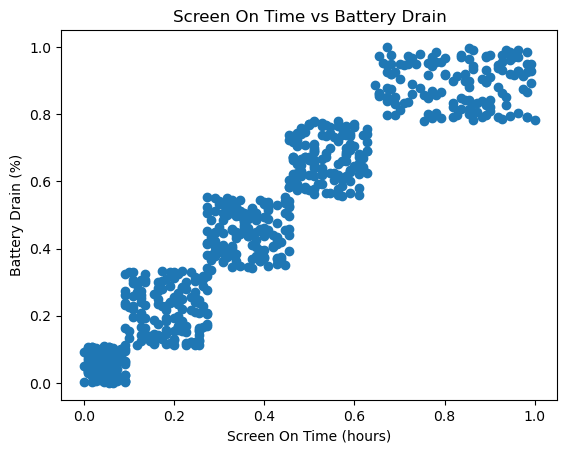

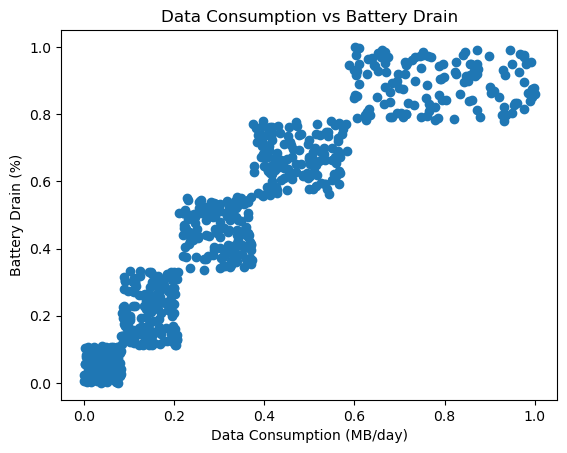

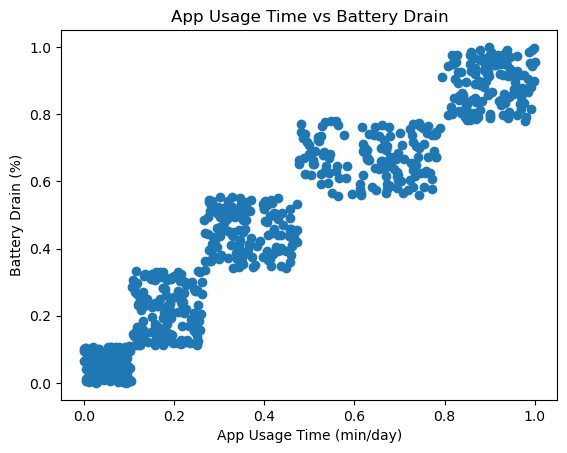

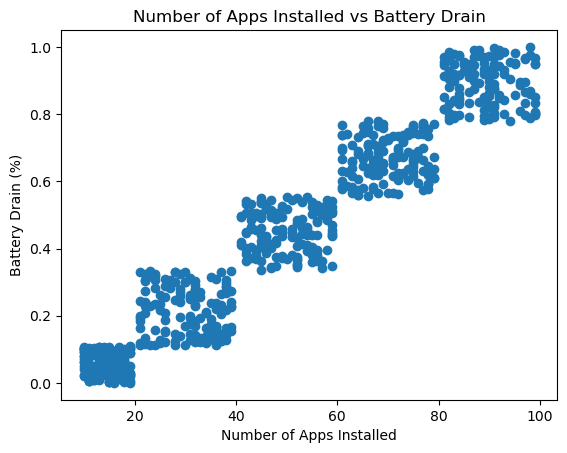

In [5]:


# Scatter plot for screen_on_time vs battery_drain
plt.scatter(df_reg['Screen On Time (hours/day)'], df_reg['Battery Drain (mAh/day)'])
plt.title('Screen On Time vs Battery Drain')
plt.xlabel('Screen On Time (hours)')
plt.ylabel('Battery Drain (%)')
plt.savefig('../visualizations/screen_on_time_vs_battery_drain.png')
plt.show()

# Scatter plot for data_consumption vs battery_drain
plt.scatter(df_reg['Data Usage (MB/day)'], df_reg['Battery Drain (mAh/day)'])
plt.title('Data Consumption vs Battery Drain')
plt.xlabel('Data Consumption (MB/day)')
plt.ylabel('Battery Drain (%)')
plt.savefig('../visualizations/data_consumption_vs_battery_drain.png')
plt.show()

# Scatter plot for App Usage Time vs battery_drain
plt.scatter(df_reg['App Usage Time (min/day)'], df_reg['Battery Drain (mAh/day)'])
plt.title('App Usage Time vs Battery Drain')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Battery Drain (%)')
plt.savefig('../visualizations/app_usage_time_vs_battery_drain.png')
plt.show()

# Scatter plot for Number of Apps Installed vs battery_drain
plt.scatter(df_reg['Number of Apps Installed'], df_reg['Battery Drain (mAh/day)'])
plt.title('Number of Apps Installed vs Battery Drain')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Battery Drain (%)')
plt.savefig('../visualizations/number_of_apps_installed_vs_battery_drain.png')
plt.show()



In [6]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score

# Define features and target variable
features = ['Screen On Time (hours/day)', 'App Usage Time (min/day)', 'Data Usage (MB/day)', 
            'Number of Apps Installed', 'Operating System']  # Assuming one-hot encoding for OS
target = 'Battery Drain (mAh/day)'

# Define X (features) and y (target)
X = df_reg[features]
y = df_reg[target]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model Evaluation
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)  # ✅ Fixes FutureWarning

print("Model R² Score:", round(r2, 4))
print("Root Mean Squared Error (RMSE):", round(rmse, 4))


Model R² Score: 0.9434
Root Mean Squared Error (RMSE): 0.0697


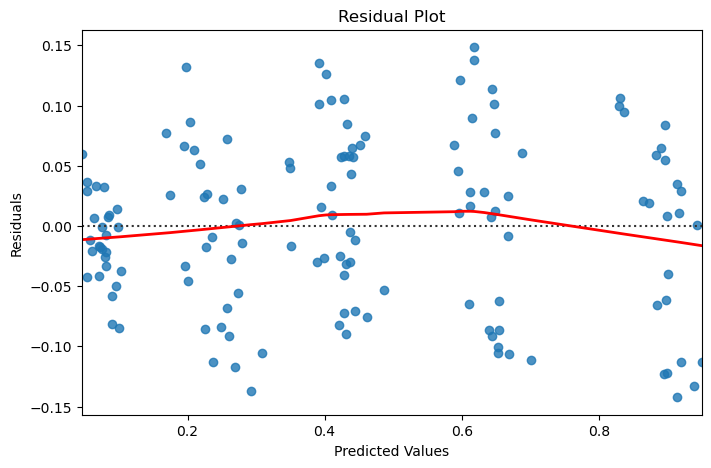

In [7]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={"color": "red", "lw": 2})

# Labels and title
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.savefig('../visualizations/residual_plot.png')
# Show plot
plt.show()

In [8]:
import joblib

# Save the model to a file
joblib.dump(model, '../models/battery_drain_model.pkl')


['../models/battery_drain_model.pkl']

In [9]:
df_reg.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

#### Hypothesis Testing

##### Do users with more apps experience higher battery drain?


In [10]:

from scipy.stats import pearsonr, ttest_ind

# Pearson correlation
corr, _ = pearsonr(df_reg['Number of Apps Installed'], df_reg['Battery Drain (mAh/day)'])
print(f'Pearson correlation: {corr}')

# Split data into 3 quantiles based on the number of apps installed
quantiles = df_reg['Number of Apps Installed'].quantile([0.33, 0.66])
low_apps = df_reg[df_reg['Number of Apps Installed'] <= quantiles[0.33]]
medium_apps = df_reg[(df_reg['Number of Apps Installed'] > quantiles[0.33]) & (df_reg['Number of Apps Installed'] <= quantiles[0.66])]
high_apps = df_reg[df_reg['Number of Apps Installed'] > quantiles[0.66]]

# T-test for different groups
t_stat, p_value = ttest_ind(low_apps['Battery Drain (mAh/day)'], high_apps['Battery Drain (mAh/day)'])
print(f'T-statistic: {t_stat}, P-value: {p_value}')


Pearson correlation: 0.9618532619047163
T-statistic: -65.16217705317031, P-value: 4.971139948469787e-235


 The hypothesis that users with more apps experience higher battery drain is supported by both the Pearson correlation and the t-test results. The very strong correlation and highly significant t-test suggest that the number of apps is indeed a major factor in battery drain.


##### Does excessive data usage significantly impact battery life?

In [ ]:
# Define high and low data usage based on the median or a chosen threshold
data_usage_threshold = df_reg['Data Usage (MB/day)'].median()

low_data_usage = df_reg[df_reg['Data Usage (MB/day)'] <= data_usage_threshold]
high_data_usage = df_reg[df_reg['Data Usage (MB/day)'] > data_usage_threshold]

# Perform a t-test to compare battery drain between high and low data usage groups
t_stat, p_value = ttest_ind(low_data_usage['Battery Drain (mAh/day)'], high_data_usage['Battery Drain (mAh/day)'])

print(f'T-statistic: {t_stat}, P-value: {p_value}')



T-statistic: -39.161488131489094, P-value: 2.500096841647699e-178


 The test shows strong evidence that users with higher data usage experience higher battery drain.

### Comparision using RandomForestRegressor

In [12]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [13]:
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.9434


In [15]:
# Train-test R² score for Linear Regression
print("Linear Regression Train R²:", model.score(X_train, y_train))
print("Linear Regression Test R²:", model.score(X_test, y_test))

# Train-test R² score for Random Forest
print("Random Forest Train R²:", model_rf.score(X_train, y_train))
print("Random Forest Test R²:", model_rf.score(X_test, y_test))


Linear Regression Train R²: 0.9464195398760253
Linear Regression Test R²: 0.9433622000312807
Random Forest Train R²: 0.9937469494230847
Random Forest Test R²: 0.9502099935900407


In [16]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
cv_scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv = np.sqrt(-cv_scores)
print(f"Cross-validated RMSE: {rmse_cv.mean():.4f} ± {rmse_cv.std():.4f}")


Cross-validated RMSE: 0.0668 ± 0.0054


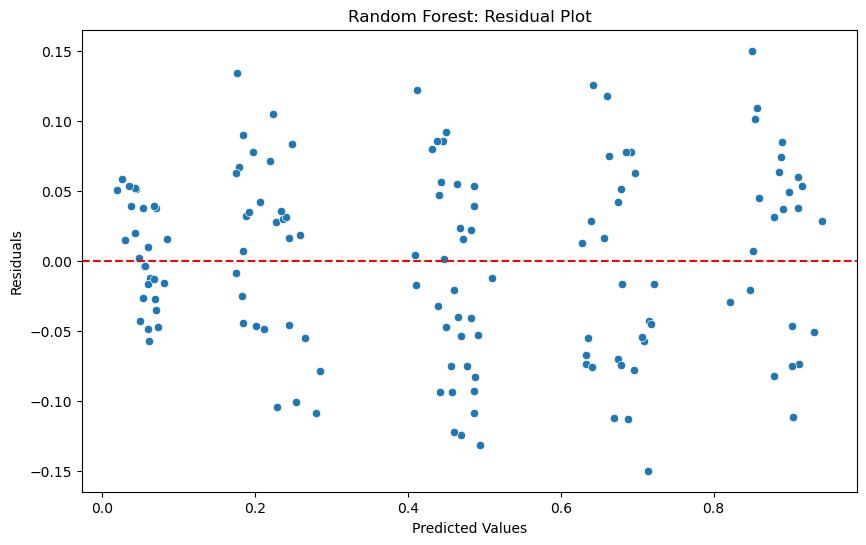

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted values vs Actual values for residual analysis
y_pred_rf = model_rf.predict(X_test)
residuals = y_test - y_pred_rf

# Residual plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Random Forest: Residual Plot")
plt.show()
